In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

In [5]:
# File to Load 
city_csv=pd.read_csv(city_data_to_load)
ride_csv=pd.read_csv(ride_data_to_load)

In [11]:
city_csv.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [12]:
ride_csv.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [423]:
#Combine the data into a single data set.
total_data=pd.merge(ride_csv,city_csv,on='city',how='outer')
total_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [172]:
 # Obtain the x and y coordinates for each of the three city types
city_data=pd.pivot_table(total_data,index=["city","type"],values=["driver_count","fare"],aggfunc=[np.mean,np.sum,len])
city_data
mean_city_data=city_data['mean']
len_city_data=city_data['len']

In [174]:
city_data.head()

mean                     sum          \
                       driver_count       fare driver_count    fare   
city          type                                                    
Amandaburgh   Urban              12  24.641667          216  443.55   
Barajasview   Urban              26  25.332273          572  557.31   
Barronchester Suburban           11  36.422500          176  582.76   
Bethanyland   Suburban           22  32.956111          396  593.21   
Bradshawfurt  Rural               7  40.064000           70  400.64   

                                len        
                       driver_count  fare  
city          type                         
Amandaburgh   Urban              18  18.0  
Barajasview   Urban              22  22.0  
Barronchester Suburban           16  16.0  
Bethanyland   Suburban           18  18.0  
Bradshawfurt  Rural              10  10.0

In [175]:
table_part_1=mean_city_data.drop(['driver_count'],axis=1)
table_part_1.head()

,,fare
city,type,
Amandaburgh,Urban,24.641667
Barajasview,Urban,25.332273
Barronchester,Suburban,36.422500
Bethanyland,Suburban,32.956111
Bradshawfurt,Rural,40.064000


In [176]:
table_part_2=len_city_data.drop(['fare'],axis=1)
table_part_2.head()

,,driver_count
city,type,
Amandaburgh,Urban,18
Barajasview,Urban,22
Barronchester,Suburban,16
Bethanyland,Suburban,18
Bradshawfurt,Rural,10


In [236]:
table=pd.merge(table_part_1,table_part_2,on=['city','type'],how='outer')
table.head()

,,fare,driver_count
city,type,,
Amandaburgh,Urban,24.641667,18
Barajasview,Urban,25.332273,22
Barronchester,Suburban,36.422500,16
Bethanyland,Suburban,32.956111,18
Bradshawfurt,Rural,40.064000,10


In [248]:
# Split up our data into groups based upon 'type' and 'city'
city_groups = table.groupby(['type','city'])

# Create a new variable that holds the sum of our groups
sum_it_up = city_groups.sum()
sum_it_up.head()

# Build the scatter plots for each city types
#urban=table[table.type=="Urban"]
#suburban=table[table.type=="Suburban"]
#rural=table[table.type=="Rural"]

#table_urban=table[urban]
#suburban_table=table[suburban]
#rural_table=table[rural]

#table.plot(kind="scatter", x="driver_count", y="fare", grid=True, figsize=(10,7),title="Pyber Ride Sharing Data (2016)")

fare  driver_count
type  city                                   
Rural Bradshawfurt    40.064000            10
      Garzaport       24.123333             3
      Harringtonfort  33.470000             6
      Jessicaport     36.013333             6
      Lake Jamie      34.358333             6

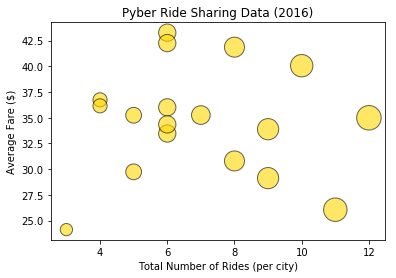

In [330]:
# Collect the information of 'rural' cities
rural_city = sum_it_up.loc['Rural']
# Place the citi type keys for that kind of area into a list
rural_list = rural_city.keys()

# Create a scatter plot with this information
import matplotlib.pyplot as plt
x=rural_city['driver_count']
y=rural_city['fare']
size=rural_city['driver_count']*50

plt.scatter(x,y,s=size,c="gold",alpha=.6,edgecolors="black",linewidth=1)

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.show()

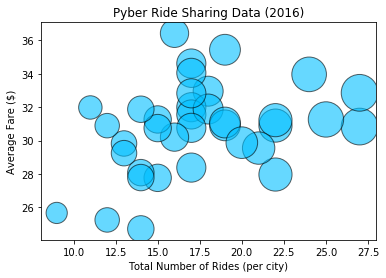

In [327]:
# Collect the information of 'urban' cities
suburban_city = sum_it_up.loc['Suburban']
# Place the citi type keys for that kind of area into a list
suburban_list = suburban_city.keys()

# Create a scatter plot with this information
import matplotlib.pyplot as plt
x=suburban_city['driver_count']
y=suburban_city['fare']
size=suburban_city['driver_count']*50

plt.scatter(x,y,s=size,c="deepskyblue",alpha=0.6,edgecolors="black",linewidth=1)

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.show()

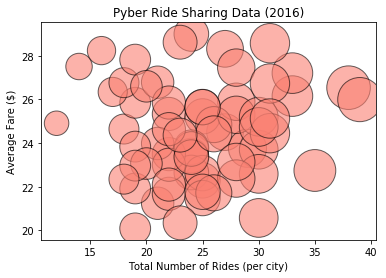

In [328]:
# Collect the information of 'urban' cities
urban_city = sum_it_up.loc['Urban']
# Place the citi type keys for that kind of area into a list
urban_list = urban_city.keys()

# Create a scatter plot with this information
import matplotlib.pyplot as plt
x=urban_city['driver_count']
y=urban_city['fare']
size=urban_city['driver_count']*50

plt.scatter(x,y,s=size,c="salmon",alpha=.6,edgecolors="black",linewidth=1,marker='o')

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.show()

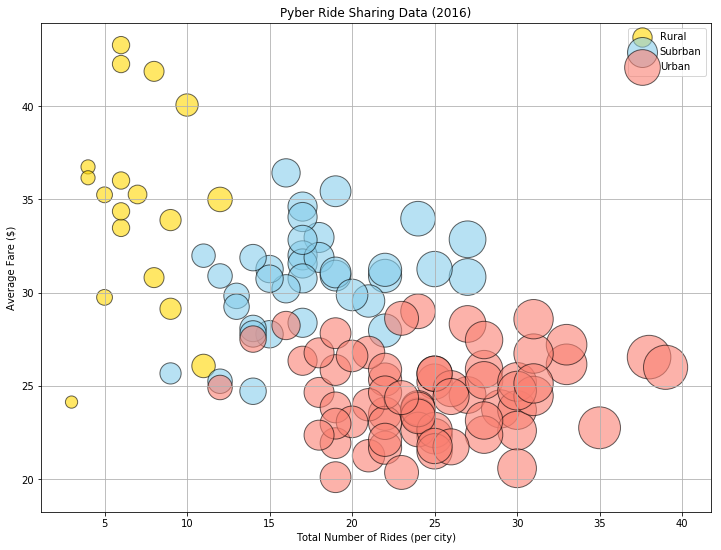

In [339]:
import matplotlib.pyplot as plt
#rural
x=rural_city['driver_count']
y=rural_city['fare']
size=rural_city['driver_count']*50
fig,ax=plt.subplots(figsize=(12,9))

plt.scatter(x,y,s=size,c="gold",alpha=.6,edgecolors="black",linewidth=1)
#suburban
x=suburban_city['driver_count']
y=suburban_city['fare']
size=suburban_city['driver_count']*50

plt.scatter(x,y,s=size,facecolor="skyblue",alpha=0.6,edgecolors="black",linewidth=1)
#urban
x=urban_city['driver_count']
y=urban_city['fare']
size=urban_city['driver_count']*50

plt.scatter(x,y,s=size,c="salmon",alpha=.6,edgecolors="black",linewidth=1)


plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
# Incorporate a text label regarding circle size
plt.legend(["Rural","Subrban","Urban"],loc=1)
plt.grid()
plt.show()

# Total Fares by City Type

In [402]:
total_drivers=pd.pivot_table(total_data,index=["type"],values=["fare"],aggfunc=[np.sum])
total_drivers.head()

,sum
,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [342]:
sum_it_up.head()

fare  driver_count
type  city                                   
Rural Bradshawfurt    40.064000            10
      Garzaport       24.123333             3
      Harringtonfort  33.470000             6
      Jessicaport     36.013333             6
      Lake Jamie      34.358333             6

In [403]:
fare_data=pd.pivot_table(sum_it_up,index=["type"],values=["fare","driver_count"],aggfunc=[np.sum])

In [404]:
percentage_fare=[4327.93/(4327.93+19356.33+39854.38)*100,19356.33/(4327.93+19356.33+39854.38)*100,39854.38/(4327.93+19356.33+39854.38)*100]

In [405]:
fare_data['percentage_fare']=percentage_fare
fare_data

sum              percentage_fare
         driver_count         fare                
type                                              
Rural             125   623.479771        6.811493
Suburban          625  1106.542729       30.463872
Urban            1625  1616.942033       62.724635

In [406]:
percentage_rides=(125/(125+625+1625)*100,625/(125+625+1625)*100,1625/(125+625+1625)*100)

In [407]:
fare_data['percentage_rides']=percentage_rides
fare_data

sum              percentage_fare percentage_rides
         driver_count         fare                                 
type                                                               
Rural             125   623.479771        6.811493         5.263158
Suburban          625  1106.542729       30.463872        26.315789
Urban            1625  1616.942033       62.724635        68.421053

In [408]:
fare_data_only=fare_data.drop(['sum'],axis=1)
fare_data_only
 
# Draw the pie chart
#axesObject.pie(populationShare, explode=explodeTuple,
 #       labels=pieLabels, 
  #      autopct='%1.2f',
   #     startangle=90)

,percentage_fare,percentage_rides
,,
type,,
Rural,6.811493,5.263158
Suburban,30.463872,26.315789
Urban,62.724635,68.421053


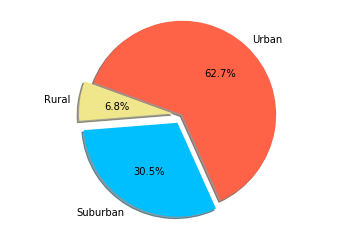

In [418]:
labels = ['Rural','Suburban','Urban']
sizes = [6.811493,30.463872,62.724635]
explode = (0.1,0.1, 0)  # only "explode" the 1st and 2nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=160, colors=['khaki','deepskyblue','tomato'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Total Rides by City Type

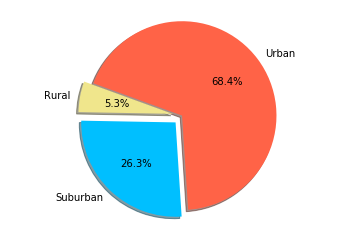

In [419]:
labels = ['Rural','Suburban','Urban']
sizes = [5.263158,26.315789,68.421053]
explode = (0.1,0.1, 0)  # only "explode" the 1st and 2nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=160, colors=['khaki','deepskyblue','tomato'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Total Drivers by City Type

In [410]:
total_drivers=pd.pivot_table(total_data,index=["type"],values=["driver_count"],aggfunc=[np.sum])
total_drivers.head()

,sum
,driver_count
type,
Rural,537
Suburban,8570
Urban,59602


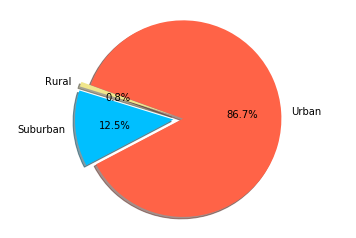

In [422]:
labels = ['Rural','Suburban','Urban']
sizes = [537/(537+8570+59602)*100,8570/(537+8570+59602)*100,59602/(537+8570+59602)*100]
explode = (0.1,0.1, 0)  # only "explode" the 1st and 2nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=160, colors=['khaki','deepskyblue','tomato'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()